In [2]:
def toDisplay(x, target_dim = None):
    while(target_dim is not None and x.dim() > target_dim):
        x = x[0]
    return x.detach().cpu().numpy()

In [3]:
from pytorch3d.transforms import Transform3d,Rotate, rotation_6d_to_matrix, se3_exp_map
from equivariant_pose_graph.utils.se3 import *
from equivariant_pose_graph.utils.display import *
from equivariant_pose_graph.dataset.point_cloud_dataset import PointCloudDataset

In [5]:
from equivariant_pose_graph.models.transformer_flow import ResidualFlow_DiffEmbTransformer
from equivariant_pose_graph.models.multimodal_transformer_flow import Multimodal_ResidualFlow_DiffEmbTransformer, Multimodal_ResidualFlow_DiffEmbTransformer_WithPZCondX
from equivariant_pose_graph.training.flow_equivariance_training_module_nocentering_eval_init import EquivarianceTestingModule
from equivariant_pose_graph.training.flow_equivariance_training_module_nocentering_multimodal import EquivarianceTrainingModule, EquivarianceTrainingModule_WithPZCondX

# place_checkpoint_file='/home/chuerp/good_mug_models/rm/epoch=120-step=15125.ckpt'
# place_network = ResidualFlow_DiffEmbTransformer(
#                     emb_nn='dgcnn', return_flow_component=True, center_feature=True,
#                     inital_sampling_ratio=1)
# place_model = EquivarianceTestingModule(
#     place_network,
#     lr=1e-4,
#     image_log_period=100,
#     weight_normalize='l1',
#     loop=1
# )

# noreg
# place_checkpoint_file="/home/jwang/code/equivariant_pose_graph/logs/residual_flow_occlusion/2022-11-21_154442/residual_flow_occlusion/2fk29m3e/checkpoints/epoch_27_global_step_7000.ckpt"
# noreg continued
# place_checkpoint_file="/home/jwang/code/equivariant_pose_graph/logs/residual_flow_occlusion/2022-12-01_025300/residual_flow_occlusion/1db7s7cq/checkpoints/epoch=125-step=31500.ckpt"
# uniform reg
# place_checkpoint_file="/home/jwang/code/equivariant_pose_graph/logs/residual_flow_occlusion/2022-11-30_155029/residual_flow_occlusion/17bt6tod/checkpoints/epoch_43_global_step_11000.ckpt"
# noreg overall mean center
# place_checkpoint_file="/home/jwang/code/equivariant_pose_graph/logs/residual_flow_occlusion/2022-12-01_025300/residual_flow_occlusion/1db7s7cq/checkpoints/epoch_123_global_step_31000.ckpt"
# noreg overall mean center. exp dense point cloud
# place_checkpoint_file="/home/jwang/code/equivariant_pose_graph/logs/residual_flow_occlusion/2022-12-01_234630/residual_flow_occlusion/2ghi50y6/checkpoints/epoch_103_global_step_26000.ckpt"
# L2 norm conditioning
# place_checkpoint_file="/home/jwang/code/equivariant_pose_graph/logs/residual_flow_occlusion/2022-12-20_175830/residual_flow_occlusion/3ppf0g8p/checkpoints/epoch_111_global_step_28000.ckpt"
# ^ l2 norm conditiong but With p(z|X)
# place_checkpoint_file="/home/jwang/code/equivariant_pose_graph/logs/residual_flow_occlusion/2022-12-22_002311/residual_flow_occlusion/15zfvyx1/checkpoints/epoch_75_global_step_19000.ckpt"
# ^ but overfit on the overfit train dataset
# place_checkpoint_file="/home/jwang/code/equivariant_pose_graph/logs/residual_flow_occlusion/2022-12-23_014459/residual_flow_occlusion/1e4vc8gx/checkpoints/epoch_35_global_step_9000.ckpt"
# ^ but the loss is only the p(z|X) loss, so it acutally optimizes
# place_checkpoint_file="/home/jwang/code/equivariant_pose_graph/logs/residual_flow_occlusion/2023-01-04_235552/residual_flow_occlusion/wcshkbzy/checkpoints/epoch_35_global_step_9000.ckpt"
# [overfit dataset] low lr and has bad kl loss. however, this looks like it has a better latent p(z|X)?
# place_checkpoint_file="/home/jwang/code/equivariant_pose_graph/logs/residual_flow_occlusion/2023-01-04_121156/residual_flow_occlusion/10mhwx6g/checkpoints/epoch_199_global_step_50000.ckpt"
# mse loss?
# place_checkpoint_file="/home/jwang/code/equivariant_pose_graph/logs/residual_flow_occlusion/2023-01-05_003452/residual_flow_occlusion/qhfhic8n/checkpoints/epoch_7_global_step_2000.ckpt"
# mse loss with only one dgcnn (no anchor/action separation)
# place_checkpoint_file="/home/jwang/code/equivariant_pose_graph/logs/residual_flow_occlusion/2023-01-05_010323/residual_flow_occlusion/3dhhdrih/checkpoints/epoch_11_global_step_3000.ckpt"
# mse loss trained on 2 mugs in the train dataset
# place_checkpoint_file="/home/jwang/code/equivariant_pose_graph/logs/residual_flow_occlusion/2023-01-05_223316/residual_flow_occlusion/2vwec0gm/checkpoints/epoch_35_global_step_9000.ckpt"
# mse loss trained on 3 mugs
# place_checkpoint_file="/home/jwang/code/equivariant_pose_graph/logs/residual_flow_occlusion/2023-01-05_231713/residual_flow_occlusion/103sexr1/checkpoints/epoch_39_global_step_10000.ckpt"
# place_checkpoint_file="/home/jwang/code/equivariant_pose_graph/logs/residual_flow_occlusion/2023-01-06_000501/residual_flow_occlusion/sp1sof97/checkpoints/epoch_75_global_step_19000.ckpt"
# inverse kl + all mugs
# place_checkpoint_file="/home/jwang/code/equivariant_pose_graph/logs/residual_flow_occlusion/2023-01-06_090446/residual_flow_occlusion/1hjwr3f8/checkpoints/epoch_15_global_step_4000.ckpt"
# forward kl + mse + all mugs
# place_checkpoint_file="/home/jwang/code/equivariant_pose_graph/logs/residual_flow_occlusion/2023-01-06_090351/residual_flow_occlusion/uqaun9iz/checkpoints/epoch_15_global_step_4000.ckpt"
# normed inverse kl + all mugs + 2 DGCNN
# place_checkpoint_file="/home/jwang/code/equivariant_pose_graph/logs/residual_flow_occlusion/2023-01-09_162211/residual_flow_occlusion/2i7yifsv/checkpoints/epoch_143_global_step_36000.ckpt"
# normed inverse kl + all mugs + 1 DGCNN not 2
# place_checkpoint_file="/home/jwang/code/equivariant_pose_graph/logs/residual_flow_occlusion/2023-01-10_000911/residual_flow_occlusion/1ds271fl/checkpoints/epoch_159_global_step_40000.ckpt"
# normed forward kl + all mugs + 1 DGCNN not 2
# place_checkpoint_file="/home/jwang/code/equivariant_pose_graph/logs/residual_flow_occlusion/2023-01-10_195720/residual_flow_occlusion/z922svt3/checkpoints/epoch_23_global_step_6000.ckpt"
# forward kl + starting from pretrained inverse kl
# place_checkpoint_file="/home/jwang/code/equivariant_pose_graph/logs/residual_flow_occlusion/2023-01-11_165435/residual_flow_occlusion/5kdqbhid/checkpoints/epoch_99_global_step_25000.ckpt"
# place_checkpoint_file="/home/jwang/code/equivariant_pose_graph/logs/residual_flow_occlusion/2023-01-11_165435/residual_flow_occlusion/5kdqbhid/checkpoints/epoch_11_global_step_3000.ckpt"
# 
# inverse kl but 2D probabilities for the 2 objects
# place_checkpoint_file="/home/jwang/code/equivariant_pose_graph/logs/residual_flow_occlusion/2023-01-12_122937/residual_flow_occlusion/22dsk7ml/checkpoints/epoch_71_global_step_18000.ckpt"

# inverse kl but with kl(mug) + kl(rack) loss
# place_checkpoint_file="/home/jwang/code/equivariant_pose_graph/logs/residual_flow_occlusion/2023-01-12_001023/residual_flow_occlusion/3czoym0x/checkpoints/epoch_95_global_step_24000.ckpt"

# mug only inverse kl
# place_checkpoint_file="/home/jwang/code/equivariant_pose_graph/logs/residual_flow_occlusion/2023-01-12_130619/residual_flow_occlusion/1mmwz1ae/checkpoints/epoch_31_global_step_8000.ckpt"


# place_checkpoint_file="/home/jwang/code/equivariant_pose_graph/logs/residual_flow_occlusion/2023-03-09_010827/residual_flow_occlusion/2r9q5ig3/checkpoints/epoch_427_global_step_107000.ckpt"

place_checkpoint_file="/home/jwang/code/equivariant_pose_graph/logs/residual_flow_occlusion/2023-04-13_172222/residual_flow_occlusion/1qzpkleo/checkpoints/epoch_483_global_step_121000.ckpt"

# place_checkpoint_file="/home/jwang/code/equivariant_pose_graph/logs/residual_flow_occlusion/2023-03-01_161450/residual_flow_occlusion/39hxjym5/checkpoints/epoch_179_global_step_45000.ckpt"

# 1 DGCNN
# 1 mug overfit inverse kl
# place_checkpoint_file="/home/jwang/code/equivariant_pose_graph/logs/residual_flow_occlusion/2023-01-12_150034/residual_flow_occlusion/3k1e3uq6/checkpoints/epoch_11_global_step_3000.ckpt"
# place_checkpoint_file="/home/jwang/code/equivariant_pose_graph/logs/residual_flow_occlusion/2023-01-12_152242/residual_flow_occlusion/3pgp6833/checkpoints/epoch_3_global_step_1000.ckpt"
# 2 mug overfit inverse kl
# place_checkpoint_file="/home/jwang/code/equivariant_pose_graph/logs/residual_flow_occlusion/2023-01-12_155828/residual_flow_occlusion/2nswo2uu/checkpoints/epoch_35_global_step_9000.ckpt"
# 3 mug overfit inverse kl
# place_checkpoint_file="/home/jwang/code/equivariant_pose_graph/logs/residual_flow_occlusion/2023-01-12_155847/residual_flow_occlusion/1rbhvbfr/checkpoints/epoch_11_global_step_3000.ckpt"
# all mugs

# 2 DGCNN
# 1 mug overfit inverse kl
# place_checkpoint_file="/home/jwang/code/equivariant_pose_graph/logs/residual_flow_occlusion/2023-01-17_145122/residual_flow_occlusion/23n57sp0/checkpoints/epoch_31_global_step_8000.ckpt"
# 2 mug overfit inverse kl
# place_checkpoint_file="/home/jwang/code/equivariant_pose_graph/logs/residual_flow_occlusion/2023-01-13_140201/residual_flow_occlusion/2ofq050u/checkpoints/epoch_31_global_step_8000.ckpt"
# 3 mug overfit inverse kl
# place_checkpoint_file="/home/jwang/code/equivariant_pose_graph/logs/residual_flow_occlusion/2023-01-17_154329/residual_flow_occlusion/3cejcxfp/checkpoints/epoch_35_global_step_9000.ckpt"

# place_checkpoint_file="/home/jwang/code/equivariant_pose_graph/logs/residual_flow_occlusion/2023-01-20_002146/residual_flow_occlusion/2ajhzffe/checkpoints/epoch_19_global_step_5000.ckpt"

# test
# place_checkpoint_file="/home/jwang/code/equivariant_pose_graph/logs/residual_flow_occlusion/2023-01-17_165433/residual_flow_occlusion/1xwalcte/checkpoints/epoch_7_global_step_2000.ckpt"
# place_checkpoint_file="/home/jwang/code/equivariant_pose_graph/logs/residual_flow_occlusion/2023-01-17_165433/residual_flow_occlusion/1xwalcte/checkpoints/epoch_3_global_step_1000.ckpt"
# place_checkpoint_file="/home/jwang/code/equivariant_pose_graph/logs/residual_flow_occlusion/2023-01-17_173655/residual_flow_occlusion/3b2lyamk/checkpoints/epoch_3_global_step_1000.ckpt"

# inner_network = ResidualFlow_DiffEmbTransformer(
#                     emb_nn='dgcnn', return_flow_component=True, center_feature=True,
#                     inital_sampling_ratio=1, input_dims=4)
# place_network = Multimodal_ResidualFlow_DiffEmbTransformer(
#                     inner_network, gumbel_temp=0.5, center_feature=True)
# place_model = EquivarianceTrainingModule(
#     place_network,
#     lr=1e-4,
#     image_log_period=100,
#     weight_normalize='softmax', #'l1',
#     softmax_temperature=1
# )

inner_network = ResidualFlow_DiffEmbTransformer(
                    emb_nn='dgcnn', return_flow_component=True, center_feature=True,
                    inital_sampling_ratio=1, input_dims=4)
place_nocond_network = Multimodal_ResidualFlow_DiffEmbTransformer(
                    inner_network, gumbel_temp=0.5, center_feature=True)
place_network = Multimodal_ResidualFlow_DiffEmbTransformer_WithPZCondX(
                    place_nocond_network, encoder_type="2_dgcnn")
place_model = EquivarianceTrainingModule(
    place_nocond_network,
    lr=1e-4,
    image_log_period=100,
    weight_normalize='softmax', #'l1',
    softmax_temperature=1
)
# place_model = EquivarianceTrainingModule_WithPZCondX(
#     place_network,
#     place_nocond_model,
# )


place_model.cuda()
place_model.load_state_dict(torch.load(place_checkpoint_file)['state_dict']);

In [6]:
from torch.utils.data import DataLoader

MUG_ID = 22
# dataset = PointCloudDataset('/home/bokorn/src/ndf_robot/data/renders', 
# dataset = PointCloudDataset('/home/jwang/code/equivariant_pose_graph/data/bokorn_ndf_robot_data_duprack_bothmugrack/renders', 
dataset = PointCloudDataset('/home/jwang/code/equivariant_pose_graph/data/train_data_duprack_bothmugrack/renders', 
# dataset = PointCloudDataset('/home/jwang/code/equivariant_pose_graph/data/test_data_duprack_bothmugrack/renders', 
# dataset = PointCloudDataset('/home/jwang/code/equivariant_pose_graph/data/train_data_duprack_bothmugrack_overfit/renders', 
                            cloud_type='teleport',
#                             cloud_type='init',
                            dataset_indices=[MUG_ID])
#                             dataset_indices=[3])
dataloader = DataLoader(dataset)

/home/jwang/code/equivariant_pose_graph/data/train_data_duprack_bothmugrack/renders/22_teleport_obj_points.npz


In [7]:
from pytorch3d.transforms import Transform3d
from pytorch_lightning.utilities.seed import seed_everything

seed_everything(0)

for data in dataloader:
    points_action = data['points_action'].cuda()[:,:-2]
    points_anchor = data['points_anchor'].cuda()
    points_action_trans = data['points_action_trans'].cuda()[:,:-2]
    points_anchor_trans = data['points_anchor_trans'].cuda()
#     T0 = Transform3d(matrix=data['T0']).cuda()
#     T1 = Transform3d(matrix=data['T1']).cuda()

    from equivariant_pose_graph.utils.se3 import random_se3
#     T0 = random_se3(1, rot_var=180, trans_var=0.5).cuda()
#     T0 = random_se3(1, rot_var=180, trans_var=0.5).cuda()
    T0 = random_se3(1, rot_var=180, trans_var=0.5).cuda()
    T0 = random_se3(1, rot_var=180, trans_var=0.5).cuda()
    T1 = random_se3(1, rot_var=180, trans_var=0.5).cuda()
    points_action_trans = T0.transform_points(points_action)
    points_anchor_trans = T1.transform_points(points_anchor)
    break

Global seed set to 0


In [8]:
# data_b = np.load("/home/bokorn/src/ndf_robot/data/renders/3_teleport_obj_points.npz")
# data_train = np.load("/home/jwang/code/equivariant_pose_graph/data/train_data_duprack_bothmugrack/renders/3_teleport_obj_points.npz")
# data_test = np.load("/home/jwang/code/equivariant_pose_graph/data/test_data_duprack_bothmugrack/renders/3_teleport_obj_points.npz")


In [9]:
# print(len(data_test['clouds'][data_test['classes'] == 0]))
# print(np.allclose(data_test['clouds'][data_test['classes'] == 0], data_b['clouds'][data_b['classes'] == 0]))





In [10]:
data.keys()

dict_keys(['points_action', 'points_anchor', 'points_action_trans', 'points_anchor_trans', 'points_action_onetrans', 'points_anchor_onetrans', 'T0', 'T1', 'T2', 'symmetric_cls', 'mug_id'])

In [11]:

# points_action_trans = points_action.detach()
# points_anchor_trans = points_anchor.detach()

In [12]:
T0._matrix

tensor([[[ 0.6711, -0.4048,  0.6211,  0.0000],
         [-0.7414, -0.3697,  0.5600,  0.0000],
         [ 0.0029, -0.8363, -0.5482,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  1.0000]]], device='cuda:0')

In [13]:
vis_train = False

if vis_train:
    place_model.train()
    res = place_model.get_transform(points_action_trans, points_anchor_trans,  points_action, points_anchor)

    pred_T_action = res['pred_T_action']
    flow_action = res['flow_components']['flow_action'][:,:,:3]
    pred_w_action = torch.sigmoid(res['flow_components']['flow_action'][:,:,3])
    flow_anchor = res['flow_components']['flow_anchor'][:,:,:3]
    pred_w_anchor = torch.sigmoid(res['flow_components']['flow_anchor'][:,:,3])
    corr_flow_action = res['flow_components']['corr_flow_action']
    corr_flow_anchor = res['flow_components']['corr_flow_anchor']
    corr_points_action = res['flow_components']['corr_points_action']
    corr_points_anchor = res['flow_components']['corr_points_anchor']
    residual_flow_action = res['flow_components']['residual_flow_action']
    residual_flow_anchor = res['flow_components']['residual_flow_anchor']
    action_attn = res['flow_components']['action_attn']
    anchor_attn = res['flow_components']['anchor_attn']
    goal_emb_action = res['flow_components']['goal_emb'][:, :, :residual_flow_action.shape[1]]
    goal_emb_anchor = res['flow_components']['goal_emb'][:, :, residual_flow_action.shape[1]:]
    dense_trans_pt_action = res['flow_components']['dense_trans_pt_action']
    dense_trans_pt_anchor = res['flow_components']['dense_trans_pt_anchor']
    trans_pt_action = res['flow_components']['trans_pt_action']
    trans_pt_anchor = res['flow_components']['trans_pt_anchor']
    trans_sample_action = res['flow_components']['trans_sample_action']
    trans_sample_anchor = res['flow_components']['trans_sample_anchor']
    goal_emb_cond_x_action = res['flow_components']['goal_emb_cond_x'][:, :, :residual_flow_action.shape[1]]
    goal_emb_cond_x_anchor = res['flow_components']['goal_emb_cond_x'][:, :, residual_flow_action.shape[1]:]
else:
    place_model.eval()
    res = place_model.training_module_no_cond_x.get_transform(points_action_trans, points_anchor_trans, points_action, points_anchor)
    residual_flow_action = res['flow_components']['residual_flow_action']
    residual_flow_anchor = res['flow_components']['residual_flow_anchor']
    goal_emb_action = res['flow_components']['goal_emb'][:, :, :residual_flow_action.shape[1]]
    goal_emb_anchor = res['flow_components']['goal_emb'][:, :, residual_flow_action.shape[1]:]
    
    res = place_model.get_transform(points_action_trans, points_anchor_trans, points_action, points_anchor)
    pred_T_action = res['pred_T_action']
    flow_action = res['flow_components']['flow_action'][:,:,:3]
    pred_w_action = torch.sigmoid(res['flow_components']['flow_action'][:,:,3])
    flow_anchor = res['flow_components']['flow_anchor'][:,:,:3]
    pred_w_anchor = torch.sigmoid(res['flow_components']['flow_anchor'][:,:,3])
    corr_flow_action = res['flow_components']['corr_flow_action']
    corr_flow_anchor = res['flow_components']['corr_flow_anchor']
    corr_points_action = res['flow_components']['corr_points_action']
    corr_points_anchor = res['flow_components']['corr_points_anchor']
    residual_flow_action = res['flow_components']['residual_flow_action']
    residual_flow_anchor = res['flow_components']['residual_flow_anchor']
    action_attn = res['flow_components']['action_attn']
    anchor_attn = res['flow_components']['anchor_attn']
    dense_trans_pt_action = res['flow_components']['dense_trans_pt_action']
    dense_trans_pt_anchor = res['flow_components']['dense_trans_pt_anchor']
    trans_pt_action = res['flow_components']['trans_pt_action']
    trans_pt_anchor = res['flow_components']['trans_pt_anchor']
    trans_sample_action = res['flow_components']['trans_sample_action']
    trans_sample_anchor = res['flow_components']['trans_sample_anchor']
    goal_emb_cond_x_action = res['flow_components']['goal_emb_cond_x'][:, :, :residual_flow_action.shape[1]]
    goal_emb_cond_x_anchor = res['flow_components']['goal_emb_cond_x'][:, :, residual_flow_action.shape[1]:]


AttributeError: 'EquivarianceTrainingModule' object has no attribute 'training_module_no_cond_x'

In [14]:
points_action_trans.shape

torch.Size([1, 1022, 3])

In [77]:
trans_pt_action 

tensor([[ 0.2535, -0.2864,  0.1061]], device='cuda:0')

In [78]:
def temp_train_forward(action_points, anchor_points, translation_sample_action, translation_sample_anchor):
    dense_trans_pt_action, ref_action = place_model.model.get_dense_translation_point(action_points, translation_sample_action)
    dense_trans_pt_anchor, ref_anchor = place_model.model.get_dense_translation_point(anchor_points, translation_sample_anchor)

    action_points_and_cond = torch.cat([action_points] + [dense_trans_pt_action], axis=1)
    anchor_points_and_cond = torch.cat([anchor_points] + [dense_trans_pt_anchor], axis=1)

    """
    action_points_and_cond = torch.cat([action_points, translation_sample_action[:,None,:]], axis=1)
    anchor_points_and_cond = torch.cat([action_points, translation_sample_anchor[:,None,:]], axis=1)
    """

    flow_action = place_model.model.tax_pose(action_points_and_cond.permute(0, 2, 1), anchor_points_and_cond.permute(0, 2, 1))

    return flow_action
train_forward = temp_train_forward(points_action_trans.transpose(1,2), points_anchor_trans.transpose(1,2), trans_sample_action, trans_sample_anchor)
train_forward

{'flow_action': tensor([[[-0.3043,  0.5293,  0.1004, -1.5977, -0.7853],
          [-0.4080,  0.3531, -0.2363, -0.1555, -0.0892],
          [-0.1950,  0.3567,  0.0567, -2.5192,  0.3197],
          ...,
          [-0.3570,  0.3229,  0.0083,  0.4379, -0.0218],
          [-0.3363,  0.5267,  0.0740, -1.5777, -0.2631],
          [-0.1929,  0.3584,  0.0247, -2.4688,  0.5518]]], device='cuda:0',
        grad_fn=<PermuteBackward0>),
 'flow_anchor': tensor([[[ 0.3097, -0.4755, -0.0095,  3.2493, -0.0862],
          [ 0.5758, -0.4802,  0.4112, -4.4213,  0.2218],
          [ 0.1031, -0.4937,  0.2628, -4.3614, -0.3646],
          ...,
          [ 0.2985, -0.4524,  0.0401,  2.7787, -0.7616],
          [ 0.2103, -0.4749,  0.3335,  2.9093, -0.4606],
          [ 0.5377, -0.5820,  0.3839, -3.5307,  0.0053]]], device='cuda:0',
        grad_fn=<PermuteBackward0>),
 'residual_flow_action': tensor([[[ 1.8853e-02, -2.0534e-02,  3.7606e-02, -1.5757e+00],
          [-3.8604e-02, -7.0288e-02, -3.4359e-02, -2.572

In [79]:
def temp_test_forward(action_points, anchor_points, u1_onehot, u2_onehot):
    dense_u1, ref_action = place_model.model.get_dense_translation_point(action_points, u1_onehot)
    dense_u2, ref_anchor = place_model.model.get_dense_translation_point(anchor_points, u2_onehot)
    
    action_points_and_cond = torch.cat([action_points] + [dense_u1], axis=1)
    anchor_points_and_cond = torch.cat([anchor_points] + [dense_u2], axis=1)

    #action_points_and_cond = torch.cat([action_points, u1_onehot[:,None,:]], axis=1)
    #anchor_points_and_cond = torch.cat([anchor_points, u2_onehot[:,None,:]], axis=1)

    # Unpermute the action and anchor point clouds to match how tax pose is written
    flow_action = place_model.model.tax_pose(action_points_and_cond.permute(0, 2, 1), anchor_points_and_cond.permute(0, 2, 1))

    return flow_action
p = torch.tensor([])
test_forward = temp_test_forward(points_action_trans.transpose(1,2), points_anchor_trans.transpose(1,2), trans_sample_action, trans_sample_anchor)
test_forward

{'flow_action': tensor([[[-0.3043,  0.5293,  0.1004, -1.5977, -0.7853],
          [-0.4080,  0.3531, -0.2363, -0.1555, -0.0892],
          [-0.1950,  0.3567,  0.0567, -2.5192,  0.3197],
          ...,
          [-0.3570,  0.3229,  0.0083,  0.4379, -0.0218],
          [-0.3363,  0.5267,  0.0740, -1.5777, -0.2631],
          [-0.1929,  0.3584,  0.0247, -2.4688,  0.5518]]], device='cuda:0',
        grad_fn=<PermuteBackward0>),
 'flow_anchor': tensor([[[ 0.3097, -0.4755, -0.0095,  3.2493, -0.0862],
          [ 0.5758, -0.4802,  0.4112, -4.4213,  0.2218],
          [ 0.1031, -0.4937,  0.2628, -4.3614, -0.3646],
          ...,
          [ 0.2985, -0.4524,  0.0401,  2.7787, -0.7616],
          [ 0.2103, -0.4749,  0.3335,  2.9093, -0.4606],
          [ 0.5377, -0.5820,  0.3839, -3.5307,  0.0053]]], device='cuda:0',
        grad_fn=<PermuteBackward0>),
 'residual_flow_action': tensor([[[ 1.8853e-02, -2.0534e-02,  3.7606e-02, -1.5757e+00],
          [-3.8604e-02, -7.0288e-02, -3.4359e-02, -2.572

In [80]:
trans_sample_action

tensor([[0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0')

In [81]:
print(points_action.shape)
print(action_attn.shape)
print(corr_flow_action.shape)
print(points_anchor.shape)
print(anchor_attn.shape)
print(corr_flow_anchor.shape)

torch.Size([1, 1022, 3])
torch.Size([1, 1022, 1024])
torch.Size([1, 1022, 4])
torch.Size([1, 1024, 3])
torch.Size([1, 1024, 1022])
torch.Size([1, 1024, 4])


In [82]:








print((residual_flow_action.norm(dim=-1) * pred_w_action).mean())
print((residual_flow_anchor.norm(dim=-1) * pred_w_anchor).mean())

tensor(0.1752, device='cuda:0', grad_fn=<MeanBackward0>)
tensor(1.7442, device='cuda:0', grad_fn=<MeanBackward0>)


In [83]:
post_action_pts = toDisplay(pred_T_action.transform_points(points_action_trans))[0]
post_anchor_pts = toDisplay(pred_T_action.inverse().transform_points(points_anchor_trans))[0]

action_pts = toDisplay(points_action)[0]
anchor_pts = toDisplay(points_anchor)[0]
action_trans_pts = toDisplay(points_action_trans)[0]
anchor_trans_pts = toDisplay(points_anchor_trans)[0]
action_flow = toDisplay(flow_action)[0]
action_flow_corr = toDisplay(corr_flow_action)[0]
action_flow_res = toDisplay(residual_flow_action)[0]
anchor_flow = toDisplay(flow_anchor)[0]
# vis_scores = toDisplay(scores)[0]
vis_attn_act = toDisplay(action_attn)[0]
vis_attn_anc = toDisplay(anchor_attn)[0]
action_w = toDisplay(pred_w_action)[0]
anchor_w = toDisplay(pred_w_anchor)[0]

In [84]:
from equivariant_pose_graph.utils.visualizations import visualize_correspondence

fig = go.FigureWidget(
        make_subplots(
            column_widths=[0.5, 0.5],
            row_heights=[1],#[0.5, 0.5],
            rows=1, cols=2,
            specs=[[{'type': 'surface'}, {'type': 'surface'}]],
        )
    )

fig.add_trace(
    go.Scatter3d(
        x = action_pts[:,0], 
        y = action_pts[:,1], 
        z = action_pts[:,2], 
        mode = 'markers',
        hoverinfo = 'none',
    ), 
    row=1,col=1
)

fig.add_trace(
    go.Scatter3d(
        x = anchor_pts[:,0], 
        y = anchor_pts[:,1], 
        z = anchor_pts[:,2], 
        mode = 'markers',
        hoverinfo = 'none',
    ), 
    row=1,col=1
)

# scatter_post_action = fig.data[-1]
# scatter_post_action.marker.size = 1
# scatter_post_action.marker.opacity = 0.5
# scatter_post_action.marker.color = '#9467bd'
# remove_background(fig)



fig

FigureWidget({
    'data': [{'hoverinfo': 'none',
              'mode': 'markers',
              'scene': 'sce…

In [85]:
from equivariant_pose_graph.utils.visualizations import visualize_correspondence

fig = go.FigureWidget(
        make_subplots(
            column_widths=[0.5, 0.5],
            row_heights=[1],#[0.5, 0.5],
            rows=1, cols=2,
            specs=[[{'type': 'surface'}, {'type': 'surface'}]],
        )
    )

fig.add_trace(
    go.Scatter3d(
        x = action_trans_pts[:,0], 
        y = action_trans_pts[:,1], 
        z = action_trans_pts[:,2], 
        mode = 'markers',
        hoverinfo = 'none',
    ), 
    row=1,col=1
)

fig.add_trace(
    go.Scatter3d(
        x = anchor_trans_pts[:,0], 
        y = anchor_trans_pts[:,1], 
        z = anchor_trans_pts[:,2], 
        mode = 'markers',
        hoverinfo = 'none',
    ), 
    row=1,col=1
)

# scatter_post_action = fig.data[-1]
# scatter_post_action.marker.size = 1
# scatter_post_action.marker.opacity = 0.5
# scatter_post_action.marker.color = '#9467bd'
# remove_background(fig)



fig

FigureWidget({
    'data': [{'hoverinfo': 'none',
              'mode': 'markers',
              'scene': 'sce…

In [86]:
from equivariant_pose_graph.utils.visualizations import visualize_correspondence

fig = visualize_correspondence(action_trans_pts, anchor_trans_pts, vis_attn_act, action_flow, 
                               weights = action_w, skip=50)
fig.add_trace(
    go.Scatter3d(
        x = post_action_pts[:,0], 
        y = post_action_pts[:,1], 
        z = post_action_pts[:,2], 
        mode = 'markers',
        hoverinfo = 'none',
    ), 
    row=1,col=1
)

scatter_post_action = fig.data[-1]
scatter_post_action.marker.size = 1
scatter_post_action.marker.opacity = 0.5
# scatter_post_action.marker.color = '#9467bd'
# remove_background(fig)



fig

FigureWidget({
    'data': [{'hoverinfo': 'none',
              'marker': {'color': array([0.16830498, 0.46120…

In [87]:
from equivariant_pose_graph.utils.visualizations import visualize_correspondence

fig = visualize_correspondence(anchor_trans_pts, action_trans_pts, vis_attn_anc, anchor_flow, weights=anchor_w, skip=50)
fig.add_trace(
    go.Scatter3d(
        x = post_anchor_pts[:,0], 
        y = post_anchor_pts[:,1], 
        z = post_anchor_pts[:,2], 
        mode = 'markers',
        hoverinfo = 'none',
    ), 
    row=1,col=1
)

scatter_post_anchor = fig.data[-1]
scatter_post_anchor.marker.size = 1
scatter_post_anchor.marker.opacity = 0.5

fig

FigureWidget({
    'data': [{'hoverinfo': 'none',
              'marker': {'color': array([0.96264845, 0.01187…



# Visualizing latent z

In [88]:
fig2 = go.FigureWidget(
    make_subplots(
            column_widths=[0.5, 0.5],
            row_heights=[1],
            rows=1, cols=2,
            specs=[[{'type': 'surface'}, {'type': 'surface'}]],
            subplot_titles=("p(z)" if not vis_train else "p(z|Y)","p(z|X)")
    )
)

action_pts_dmean = action_pts - np.concatenate([action_pts, anchor_pts], axis=0).mean(axis=0)
fig2.add_trace(
    go.Scatter3d(
        x = action_pts_dmean[:,0], 
        y = action_pts_dmean[:,1], 
        z = action_pts_dmean[:,2], 
        mode = 'markers',
        hoverinfo = 'none',
        name='action_demo',
    ), 
    row=1, col=1
)



action_trans_pts_dmean = action_trans_pts - action_trans_pts.mean(axis=0)
fig2.add_trace(
    go.Scatter3d(
        x = action_pts_dmean[:,0], 
        y = action_pts_dmean[:,1], 
        z = action_pts_dmean[:,2], 
#         x = action_trans_pts_dmean[:,0], 
#         y = action_trans_pts_dmean[:,1], 
#         z = action_trans_pts_dmean[:,2], 
        mode = 'markers',
        hoverinfo = 'none',
        name='action_demo',
    ), 
    row=1, col=2
)

# fig2.data[0].marker.color = goal_emb_action[0,0].detach().cpu().numpy()
# big, small = F.softmax(goal_emb_action[0,0]).detach().cpu().numpy().max(), F.softmax(goal_emb_action[0,0]).detach().cpu().numpy().min()
# w = big - small
# pzy_color = F.softmax(goal_emb_action[0,0]).detach().cpu().numpy()
# pzy_color[pzy_color > small + w*0.09] = 0

# fig2.data[0].marker.color = pzy_color

goal_emb_action_colors = color_gradient(F.softmax(goal_emb_action[0], dim=-1))
goal_emb_cond_x_action_colors = color_gradient(F.softmax(goal_emb_cond_x_action[0], dim=-1))
    
fig2.data[0].marker.color = goal_emb_action_colors[0]
fig2.data[1].marker.color = goal_emb_cond_x_action_colors[0]



# fig2.data[0].marker.color = F.softmax(goal_emb_action[0,0]).detach().cpu().numpy()
# fig2.data[1].marker.color = F.softmax(goal_emb_cond_x_action[0,0]).detach().cpu().numpy()

print(f"Mug #{MUG_ID}")
fig2

Mug #22


FigureWidget({
    'data': [{'hoverinfo': 'none',
              'marker': {'color': array([[  0.,   0., 255.],…

In [96]:
goal_emb_cond_x_action_colors[0].shape

(1022, 3)

In [97]:
only_mug = True
if only_mug:
    def test(goal_emb_cond_x, goal_emb):
        B, K, D = goal_emb.shape
    #     print(goal_emb_cond_x[:, :, :D//2].shape)
    #     print(goal_emb[:, :, :D//2].shape)
        goal_emb_loss = F.kl_div(F.log_softmax(goal_emb_cond_x[:, :, :], dim=-1), F.log_softmax(goal_emb[:, :, :], dim=-1), log_target=True, reduction='batchmean')
    #                 + F.kl_div(F.log_softmax(goal_emb_cond_x[:, :, D//2:], dim=-2), F.log_softmax(goal_emb[:, :, D//2:], dim=-2), log_target=True, reduction='batchmean')
    #     return F.kl_div(F.log_softmax(goal_emb_cond_x.reshape(B, K, D, 1), dim=-2), F.log_softmax(goal_emb.reshape(B, K, D, 1), dim=-2), log_target=True, reduction='batchmean')
        return goal_emb_loss

    print(f"Mug KL: {test(goal_emb_cond_x_action, goal_emb_action).item():.3f}")
else:
    def test(goal_emb_cond_x, goal_emb):
        B, K, D = goal_emb.shape
    #     print(goal_emb_cond_x[:, :, :D//2].shape)
    #     print(goal_emb[:, :, :D//2].shape)
        goal_emb_loss = F.kl_div(F.log_softmax(goal_emb_cond_x[:, :, :], dim=-1), F.log_softmax(goal_emb[:, :, :], dim=-1), log_target=True, reduction='batchmean') \
    #                 + F.kl_div(F.log_softmax(goal_emb_cond_x[:, :, D//2:], dim=-2), F.log_softmax(goal_emb[:, :, D//2:], dim=-2), log_target=True, reduction='batchmean')
    #     return F.kl_div(F.log_softmax(goal_emb_cond_x.reshape(B, K, D, 1), dim=-2), F.log_softmax(goal_emb.reshape(B, K, D, 1), dim=-2), log_target=True, reduction='batchmean')
        return goal_emb_loss


    print(f"Rack KL: {test(goal_emb_cond_x_anchor, goal_emb_anchor).item():.3f}, Mug KL: {test(goal_emb_cond_x_action, goal_emb_action).item():.3f}")


Mug KL: 0.407


In [2226]:
F.kl_div(F.log_softmax(goal_emb_cond_x[:,:,:1024], dim=-1), F.log_softmax(goal_emb[:,:,:1024], dim=-1), log_target=True, reduction='batchmean')
F.kl_div(F.log_softmax(goal_emb_cond_x.reshape(B, K, D//2, 2), dim=-1), F.log_softmax(goal_emb, dim=-1).reshape(B, K, D//2, 2), log_target=True, reduction='batchmean')


B, K, D = goal_emb.shape
F.kl_div(F.log_softmax(goal_emb_cond_x, dim=-1).reshape((B*K, D)), F.log_softmax(goal_emb, dim=-1).reshape((B*K, D)), log_target=True, reduction='batchmean')
/home/jwang/code/equivariant_pose_graph/logs/residual_flow_occlusion/2023-01-09_162211/residual_flow_occlusion/2i7yifsv/checkpoints/epoch_55_global_step_14000.ckpt

F.kl_div(F.log_softmax(goal_emb_cond_x[0,0,1024:], dim=-1), F.log_softmax(goal_emb[0,0,1024:], dim=-1), log_target=True, reduction='mean')

F.kl_div(F.log_softmax(goal_emb_cond_x[:,0,:], dim=-1), F.log_softmax(goal_emb[:,0,:], dim=-1), log_target=True, reduction='batchmean')



F.kl_div(F.log_softmax(goal_emb_cond_x, dim=-1), F.log_softmax(goal_emb, dim=-1), log_target=True, reduction='mean')




SyntaxError: invalid token (<ipython-input-2226-fccae06441e5>, line 7)

In [2227]:
F.log_softmax(goal_emb_cond_x_action, dim=-1).exp().sum()

F.softmax(goal_emb_cond_x[:,:,:1024], dim=-1)

NameError: name 'goal_emb_cond_x' is not defined

In [2228]:
fig2 = go.FigureWidget(
    make_subplots(
            column_widths=[0.5, 0.5],
            row_heights=[1],
            rows=1, cols=2,
            specs=[[{'type': 'surface'}, {'type': 'surface'}]],
            subplot_titles=("p(z)" if not vis_train else "p(z|Y)","p(z|X)")
    )
)

fig2.add_trace(
    go.Scatter3d(
        x = anchor_pts[:,0], 
        y = anchor_pts[:,1], 
        z = anchor_pts[:,2], 
        mode = 'markers',
        hoverinfo = 'none',
        name='anchor_demo',
    ), 
    row=1, col=1
)

fig2.add_trace(
    go.Scatter3d(
        x = anchor_trans_pts[:,0], 
        y = anchor_trans_pts[:,1], 
        z = anchor_trans_pts[:,2], 
        mode = 'markers',
        hoverinfo = 'none',
        name='anchor_demo',
    ), 
    row=1, col=2
)

fig2.data[0].marker.color = F.log_softmax(goal_emb_anchor[0,0]).detach().cpu().numpy()
fig2.data[1].marker.color = F.log_softmax(goal_emb_cond_x_anchor[0,0]).detach().cpu().numpy()

fig2

/home/jwang/miniconda3/envs/myclone/lib/python3.7/site-packages/ipykernel_launcher.py:35: UserWarning:

Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.

/home/jwang/miniconda3/envs/myclone/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning:

Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.



FigureWidget({
    'data': [{'hoverinfo': 'none',
              'marker': {'color': array([-15.665501, -14.756…

# Visualizing the dense translation points

In [2229]:
fig = go.FigureWidget(
        make_subplots(
            column_widths=[0.5, 0.5],
            row_heights=[1],
            rows=1, cols=2,
            specs=[[{'type': 'surface'}, {'type': 'surface'}]],
        )
    )

fig.add_trace(
    go.Scatter3d(
        x = action_trans_pts[:,0], 
        y = action_trans_pts[:,1], 
        z = action_trans_pts[:,2], 
        mode = 'markers',
        hoverinfo = 'none',
    ), 
)
# mean_center = action_trans_pts.mean(axis=0)[None,:]
# mean_center = torch.cat([points_action[0], points_anchor[0]], axis=0).mean(axis=0)[None,:]
mean_center = np.array([[0, 0, 0]])
uncenter_trans_pt_action = toDisplay(trans_pt_action) + mean_center
fig.add_trace(
    go.Scatter3d(
        x = uncenter_trans_pt_action[0,0:1], 
        y = uncenter_trans_pt_action[0,1:2], 
        z = uncenter_trans_pt_action[0,2:3], 
        mode = 'markers',
        hoverinfo = 'none',
        marker=dict(
            color='DarkSlateGrey'
        )
    ), 
)


# i = 474
# ref = np.zeros((1, action_trans_pts.shape[0]))
# ref[:, i] = 1
# dense = get_dense_translation_point(action_trans_pts.T[None,:,:], ref)

# fig.data[0].marker.color = dense[0].mean(axis=0)


fig.data[0].marker.color = dense_trans_pt_action[0].mean(axis=0).detach().cpu().numpy()
# fig.data[1].marker.color = np.array([0])

fig

FigureWidget({
    'data': [{'hoverinfo': 'none',
              'marker': {'color': array([0.15570278, 0.13593…

In [522]:
def get_dense_translation_point(points, ref):
    """
        points- point cloud. (B, 3, num_points)
        ref- one hot vector (or nearly one-hot) that denotes the reference point
                 (B, num_points)

        Returns:
            dense point cloud. Each point contains the distance to the reference point (B, 3, num_points)
    """
    assert ref.ndim == 2
    assert torch.allclose(ref.sum(axis=1), torch.full((ref.shape[0], 1), 1, dtype=torch.float, device=ref.device))
    num_points = points.shape[2]
    reference = (points*ref[:,None,:]).sum(axis=2)
#     dense = torch.norm(reference[:, :, None] - points, dim=1, keepdim=True)
    dense = reference[:, :, None] - points
#        dense = torch.abs(reference[:, :, None] - points)
#        dense = torch.exp(-dense / 0.1)
#        dense = torch.exp(-dense.abs() / 0.1)
    return dense, reference

temp_points_action_trans = T0.transform_points(points_action)

i = 474
ref_onehot = torch.zeros((1, points_action_trans.shape[1]), device=points_action_trans.device)
ref_onehot[:, i] = 1

dense_Y_action, ref_ptY = get_dense_translation_point(points_action.transpose(1, 2), ref_onehot)

i = 474
ref_onehot = torch.zeros((1, temp_points_action_trans.shape[1]), device=points_action_trans.device)
ref_onehot[:, i] = 1
dense_X_action, ref_ptX = get_dense_translation_point(temp_points_action_trans.transpose(1, 2), ref_onehot)


fig = go.FigureWidget(
        make_subplots(
            column_widths=[0.5, 0.5],
            row_heights=[1],
            rows=1, cols=2,
            specs=[[{'type': 'surface'}, {'type': 'surface'}]],
        )
    )


fig.add_trace(
    go.Scatter3d(
        x = action_pts[:,0], 
        y = action_pts[:,1], 
        z = action_pts[:,2], 
        mode = 'markers',
        hoverinfo = 'none',
    ), 
    row=1, col=1
)

temp_action_trans_pts = toDisplay(temp_points_action_trans)[0]
fig.add_trace(
    go.Scatter3d(
        x = temp_action_trans_pts[:,0], 
        y = temp_action_trans_pts[:,1], 
        z = temp_action_trans_pts[:,2], 
        mode = 'markers',
        hoverinfo = 'none',
    ), 
    row=1, col=2
)

color1 = np.linalg.norm(dense_Y_action[0].detach().cpu().numpy(), axis=0)
color1[i] = 0.03
fig.data[0].marker.color = color1

color2 = np.linalg.norm(dense_X_action[0].detach().cpu().numpy(), axis=0)
color2[i] = 0.03
fig.data[1].marker.color = color2

fig







# dense = get_dense_translation_point(action_trans_pts.T[None,:,:], ref)

# fig.data[0].marker.color = dense[0].mean(axis=0)

FigureWidget({
    'data': [{'hoverinfo': 'none',
              'marker': {'color': array([0.10143127, 0.13227…

In [523]:
assert(np.allclose(np.linalg.norm(dense_Y_action[0].detach().cpu().numpy(), axis=0), np.linalg.norm(dense_X_action[0].detach().cpu().numpy(), axis=0)))






In [524]:
print(dense_Y_action.shape, dense_X_action.shape)
# print(torch.allclose(T0.inverse().transform_points(torch.abs(dense_Y_action[0].T)), torch.abs(dense_X_action[0].T)))

# True
print(torch.allclose(ref_ptX - points_action_trans[0],
                     dense_X_action[0].T))

# True
print(torch.allclose(T0.transform_points(ref_ptY), 
                     ref_ptX))

# True
print(torch.allclose(T0.transform_points(points_action[0]), 
                     points_action_trans[0]))

# False even though this is a direct substitution??
print(torch.allclose(T0.transform_points(ref_ptY) - T0.transform_points(points_action[0]),
                     dense_X_action[0].T, atol=1e-7))

print(torch.allclose(T0.transform_points(dense_Y_action[0].T) - T0._matrix[0, 3,:3],
                     dense_X_action[0].T, atol=1e-7))

only_R = Rotate(T0._matrix.detach().clone()[0, :3,:3], device=T0.device).translate(torch.tensor([[0,0,0]]))
print(torch.allclose(only_R.transform_points(dense_Y_action[0].T),
                     dense_X_action[0].T, atol=1e-7))


torch.Size([1, 3, 1022]) torch.Size([1, 3, 1022])
True
True
True
True
False
True


In [525]:

fig = go.FigureWidget()
fig.add_trace(
    go.Scatter3d(
        x = anchor_trans_pts[:,0], 
        y = anchor_trans_pts[:,1], 
        z = anchor_trans_pts[:,2], 
        mode = 'markers',
        hoverinfo = 'none',
    ), 
)

# mean_center = torch.cat([points_action[0], points_anchor[0]], axis=0).mean(axis=0)[None,:]
mean_center = torch.tensor([[0, 0, 0]], device=points_action.device)
fig.add_trace(
    go.Scatter3d(
        x = (trans_pt_anchor+mean_center).detach().cpu().numpy()[0,0:1], 
        y = (trans_pt_anchor+mean_center).detach().cpu().numpy()[0,1:2], 
        z = (trans_pt_anchor+mean_center).detach().cpu().numpy()[0,2:3], 
        mode = 'markers',
        hoverinfo = 'none',
    ), 
)


# i = 135
# ref = np.zeros((1, anchor_pts.shape[0]))
# ref[:, i] = 1
# dense = get_dense_translation_point(anchor_pts.T[None,:,:], ref)
# print(dense.max(), dense.min())
# fig.data[0].marker.color = dense[0].mean(axis=0)

fig.data[0].marker.color = dense_trans_pt_anchor[0].mean(axis=0).detach().cpu().numpy()

fig

FigureWidget({
    'data': [{'hoverinfo': 'none',
              'marker': {'color': array([0.36586705, 0.34704…

In [526]:

fig = go.FigureWidget(
        make_subplots(
            column_widths=[0.5, 0.5],
            row_heights=[1],#[0.5, 0.5],
            rows=1, cols=2,
            specs=[[{'type': 'surface'}, {'type': 'surface'}]],
        )
    )

fig.add_trace(
    go.Scatter3d(
        x = action_trans_pts[:,0], 
        y = action_trans_pts[:,1], 
        z = action_trans_pts[:,2], 
        mode = 'markers',
        hoverinfo = 'none',
    ), 
    row=1, col=1
)

fig.add_trace(
    go.Scatter3d(
        x = action_pts[:,0], 
        y = action_pts[:,1], 
        z = action_pts[:,2], 
        mode = 'markers',
        hoverinfo = 'none',
    ), 
    row=1, col=2
)

colors = np.zeros((action_trans_pts.shape[0],))
colors[toDisplay(trans_sample_action).argmax()] = 1

fig.data[0].marker.color = colors

fig.data[1].marker.color = colors

fig

FigureWidget({
    'data': [{'hoverinfo': 'none',
              'marker': {'color': array([0., 0., 0., ..., 0.…

In [527]:

fig = go.FigureWidget(
        make_subplots(
            column_widths=[0.5, 0.5],
            row_heights=[1],#[0.5, 0.5],
            rows=1, cols=2,
            specs=[[{'type': 'surface'}, {'type': 'surface'}]],
        )
    )

fig.add_trace(
    go.Scatter3d(
        x = anchor_trans_pts[:,0], 
        y = anchor_trans_pts[:,1], 
        z = anchor_trans_pts[:,2], 
        mode = 'markers',
        hoverinfo = 'none',
    ), 
    row=1, col=1
)

fig.add_trace(
    go.Scatter3d(
        x = anchor_pts[:,0], 
        y = anchor_pts[:,1], 
        z = anchor_pts[:,2], 
        mode = 'markers',
        hoverinfo = 'none',
    ), 
    row=1, col=2
)

colors = np.zeros((anchor_trans_pts.shape[0],))
colors[toDisplay(trans_sample_anchor).argmax()] = 1

fig.data[0].marker.color = colors

fig.data[1].marker.color = colors

fig

FigureWidget({
    'data': [{'hoverinfo': 'none',
              'marker': {'color': array([0., 0., 0., ..., 0.…

In [284]:
Hacky Jupyter Notebook Break 

SyntaxError: invalid syntax (<ipython-input-284-761bd19ebfbf>, line 1)

<IPython.core.display.Javascript object>


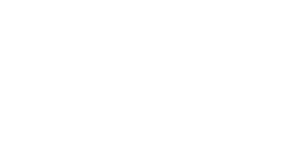

(-0.46866314485669136,
 0.3901887275278568,
 -0.6300862096250057,
 0.22876566275954247)

In [350]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
fig = plt.figure()

skip = 1
flow_skip = 100

ax = fig.add_subplot(111, projection='3d')
c_action = (action_pts - np.min(action_pts, axis=0))/(np.max(action_pts, axis=0) - np.min(action_pts, axis=0))


action_corr = action_pts + action_flow
ax.scatter3D(
    action_pts[::skip,0], 
    action_pts[::skip,1], 
    action_pts[::skip,2],
    s=10*action_w, c=c_action, alpha=0.5)

ax.scatter3D(
    action_pts[::skip,0], 
    action_pts[::skip,1], 
    action_pts[::skip,2],
    s=0.1, c='gray', alpha=0.1)

ax.scatter3D(
    anchor_pts[::skip,0], 
    anchor_pts[::skip,1], 
    anchor_pts[::skip,2],
    s=0.1, c='gray', alpha=0.5)

ax.scatter3D(
    action_corr[::skip,0], 
    action_corr[::skip,1], 
    action_corr[::skip,2],
    s=10*action_w, c=c_action, alpha=0.5)

set_axes_equal(ax)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# ax.xaxis.pane.set_edgecolor('w')
# ax.yaxis.pane.set_edgecolor('w')
# ax.zaxis.pane.set_edgecolor('w')

ax.grid(False)
ax.axis('off')

<IPython.core.display.Javascript object>


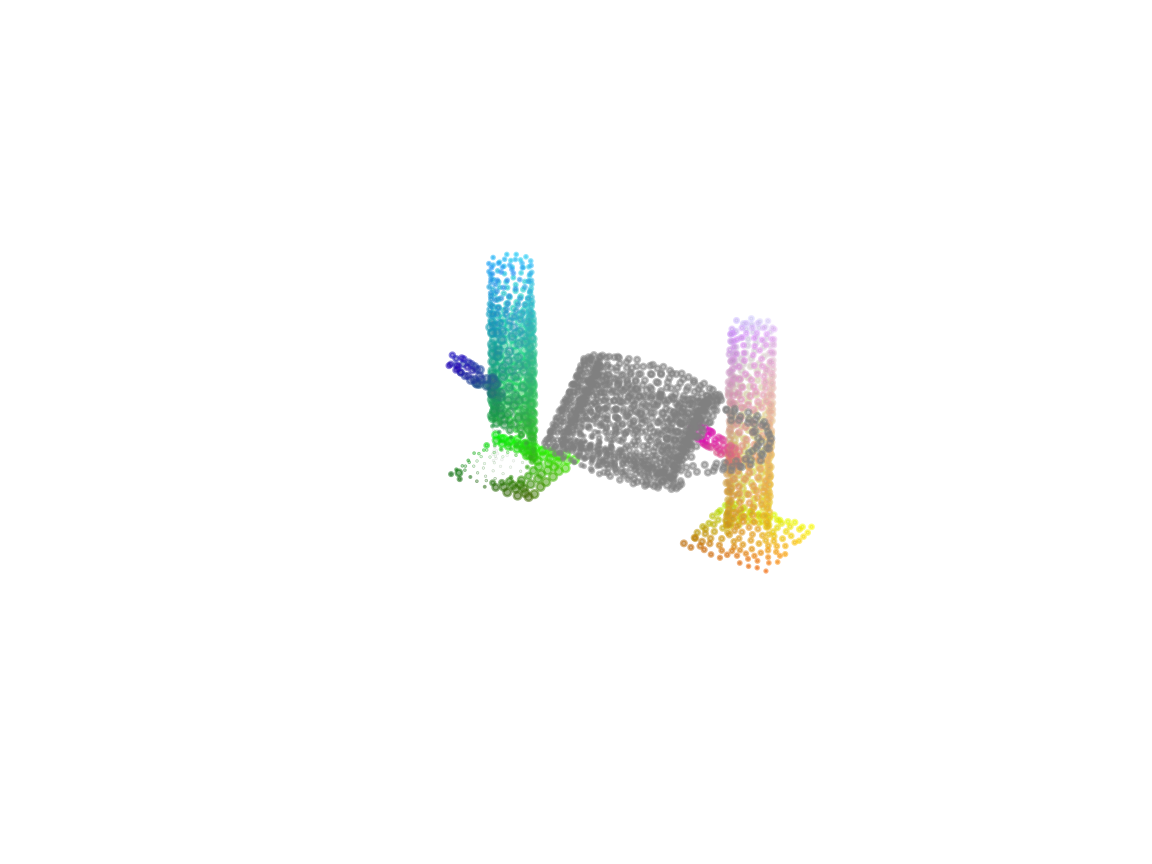

(-0.2732612624764442,
 0.17195366173982618,
 -0.19135460853576658,
 0.2538603156805038)

In [351]:
%matplotlib notebook
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
fig = plt.figure()

skip = 1
flow_skip = 100

ax = fig.add_subplot(111, projection='3d')
c_anchor = (anchor_pts - np.min(anchor_pts, axis=0))/(np.max(anchor_pts, axis=0) - np.min(anchor_pts, axis=0))


anchor_corr = anchor_pts + anchor_flow
ax.scatter3D(
    action_pts[::skip,0], 
    action_pts[::skip,1], 
    action_pts[::skip,2],
    s=10*action_w, c='gray', alpha=0.5)

ax.scatter3D(
    anchor_pts[::skip,0], 
    anchor_pts[::skip,1], 
    anchor_pts[::skip,2],
    s=10*anchor_w, c=c_anchor, alpha=0.5)

ax.scatter3D(
    anchor_pts[::skip,0], 
    anchor_pts[::skip,1], 
    anchor_pts[::skip,2],
    s=0.1, c='gray', alpha=0.1)

# ax.scatter3D(
#     anchor_corr[::skip,0], 
#     anchor_corr[::skip,1], 
#     anchor_corr[::skip,2],
#     s=10*anchor_w, c=c_anchor, alpha=0.5)

set_axes_equal(ax)
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

# ax.xaxis.pane.set_edgecolor('w')
# ax.yaxis.pane.set_edgecolor('w')
# ax.zaxis.pane.set_edgecolor('w')

ax.grid(False)
ax.axis('off')